In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/255_Dataset/basic_data_files.csv"

'/content/drive/My Drive/255_Dataset/basic_data_files.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/255_Dataset/basic_data_files.csv'
                      , sep=',' ,nrows=3)

In [ ]:
df.columns[60:90]

Index(['6.2_M71', '6.2_M81', '6.2_M82', '6.2_M72', '6.2_M63', '6.2_M66',
       '6.2_M67', '6.2_M64', '6.2_M65', '6.2_M73', '6.2_M79', '6.2_M90',
       '6.2_M94', '6.2_M99', 'OFF-SITE_RELEASE_TOTAL', '6.2_M20', '6.2_M24',
       '6.2_M26', '6.2_M28', '6.2_M93', 'OFF-SITE_RECYCLED_TOTAL', '6.2_M56',
       '6.2_M92', 'OFF-SITE_RECOVERY_TOTAL', '6.2_M40', '6.2_M50', '6.2_M54',
       '6.2_M61', '6.2_M69', '6.2_M95'],
      dtype='object')

**Load all rows with only selected columns**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/255_Dataset/basic_data_files.csv'
                      , sep=',' 
                      , usecols=['YEAR', 'TRI_FACILITY_ID', 'FACILITY_NAME', 'LATITUDE', 'LONGITUDE','ST','FEDERAL_FACILITY',
                                 'INDUSTRY_SECTOR','CHEMICAL','CLEAR_AIR_ACT_CHEMICAL','CAS_#/COMPOUND_ID', 'CLASSIFICATION', 'METAL', 'METAL_CATEGORY',
                                 'CARCINOGEN','5.1_FUGITIVE_AIR', '5.2_STACK_AIR','5.3_WATER','5.4_UNDERGROUND','5.5.1_LANDFILLS',
                                 '5.5.2_LAND_TREATMENT','5.5.3_SURFACE_IMPOUNDMENT', '5.5.4_OTHER_DISPOSAL','ON-SITE_RELEASE_TOTAL','OFF-SITE_RELEASE_TOTAL',
                                 'OFF-SITE_RECYCLED_TOTAL','OFF-SITE_RECOVERY_TOTAL','OFF-SITE_TREATED_TOTAL',
                                 'TOTAL_RELEASES','PROD._WASTE_(8.1_THRU_8.7)','PARENT_COMPANY_NAME'],
                 nrows = 2548769)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,11,12,35,39,40,41,42,45,48,49,52,53,74,80,83,90,91,103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,TRI_FACILITY_ID,FACILITY_NAME,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CAS_#/COMPOUND_ID,CLEAR_AIR_ACT_CHEMICAL,CLASSIFICATION,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.2_LAND_TREATMENT,5.5.3_SURFACE_IMPOUNDMENT,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,OFF-SITE_RECYCLED_TOTAL,OFF-SITE_RECOVERY_TOTAL,OFF-SITE_TREATED_TOTAL,TOTAL_RELEASES,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME
0,2016,46552DCTLT30350,EDCOAT LLC,IN,41.6934,-86.4552,NO,Fabricated Metals,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,N090,YES,TRI,YES,1,NO,0,0,0,0,0,0,0,0,0,1170.32,0,0,0,1170.41,1170.32,NaN
1,2016,01950NNSPC3MALC,UNION SPECIALTIES INC,MA,42.7964,-70.8904,NO,Chemicals,CERTAIN GLYCOL ETHERS,N230,YES,TRI,NO,0,NO,1,17,0,0,0,0,0,0,18,0,0,0,0,18,18,NaN
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,OH,40.7847,-81.9396,NO,Food,ZINC COMPOUNDS,N982,NO,TRI,YES,1,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CARGILL INC
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,MA,41.7254,-70.9552,NO,Miscellaneous Manufacturing,DIISOCYANATES,N120,YES,TRI,NO,0,NO,0,0,0,0,0,0,0,0,0,0,0,2191,106,0,2297,ACUSHNET HOLDINGS CORP
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,GA,33.6272,-84.3868,NO,Chemicals,CERTAIN GLYCOL ETHERS,N230,YES,TRI,NO,0,NO,5,5,0,0,0,0,0,0,10,20,0,0,230,50,260,THE CLOROX CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548764,1993,92704PWRCR2645S,TTM TECHNOLOGIES INC,CA,33.7115,-117.922,NO,Computers and Electronic Products,COPPER,007440508,NO,TRI,YES,1,NO,0,0,0,0,0,0,0,0,0,250,66400,0,0,500,66818,TTM TECHNOLOGIES INC
2548765,1993,61240KNNCS2266U,KONE INC ESCALATOR DIV,IL,41.4559,-90.3897,NO,Machinery,COPPER,007440508,NO,TRI,YES,1,NO,0,0,0,0,0,0,0,0,0,0,1570,0,0,0,1570,"KONE, INC"
2548766,1993,46514THCNT28722,TRUCK ACCESSORIES GROUP INC. DBA CENTURY FIBER...,IN,41.7298,-86.018,NO,Plastics and Rubber,STYRENE,000100425,YES,TRI,NO,0,YES,2143,8569,0,0,0,0,0,0,10712,0,0,1551,0,10712,12263,TRUCK ACCESSORIES GROUP INC
2548767,1993,46787HTRSN601HA,DEKKO HEATING TECHNOLOGIES #25,IN,41.0909,-85.6334,NO,Electrical Equipment,ANTIMONY COMPOUNDS,N010,YES,TRI,YES,1,NO,0,0,0,0,0,0,0,0,0,1114,0,0,0,1114,5066,DEKKO HEATING TECHS


In [ ]:
#df[2548769:2549000]

In [ ]:
sum(df['YEAR'].map(type) != int)

237568

In [ ]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
1993     74785
1994     73728
1995     65536
1996     73728
1997     65536
1998     81920
1999     81920
2000     81920
2001     90112
2002     90112
2003     81920
2004     90112
2005     81920
2006     81920
2007     81920
2008     73728
2009     73728
2010     73728
2011    147456
2012    163840
2013    147456
2014    147456
2015    147456
2016    139264
1993      8177
1994      4055
1995     12164
1996      1956
1997     10126
1998      8880
1999      4959
2000     12216
2001      8488
2002      5983
2003     12304
2004      2022
2005      9960
2006      8901
2007      7041
2008     13094
2009      7868
2010      8348
2011     17306
2012      1348
2013     18234
2014     19122
2015     15540
2016     19446
YEAR        30
dtype: int64

In [ ]:
df = df.drop(df[df.YEAR == 'YEAR'].index)

In [ ]:
sum(df['YEAR'].map(type) != int)

237538

In [ ]:
#df[793556]
df['YEAR'] = pd.to_numeric(df['YEAR'])

In [ ]:
sum(df['YEAR'].map(type) != int)

0

In [ ]:
sum(df['YEAR'].isnull()==True)

0

In [ ]:
from scipy import stats

most_freq_year, count = stats.mode(df['YEAR'])

year_mode = int(most_freq_year) # which age occurs most frequently in the dataset
print(year_mode)

2014


In [ ]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
1993     82962
1994     77783
1995     77700
1996     75684
1997     75662
1998     90800
1999     86879
2000     94136
2001     98600
2002     96095
2003     94224
2004     92134
2005     91880
2006     90821
2007     88961
2008     86822
2009     81596
2010     82076
2011    164762
2012    165188
2013    165690
2014    166578
2015    162996
2016    158710
dtype: int64

In [ ]:
df = df.drop(df[df.YEAR <2007].index)

In [ ]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
2007     88961
2008     86822
2009     81596
2010     82076
2011    164762
2012    165188
2013    165690
2014    166578
2015    162996
2016    158710
dtype: int64

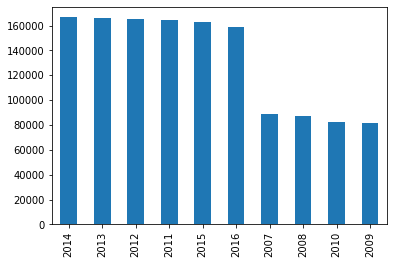

In [ ]:
df.YEAR.value_counts().plot.bar()


In [ ]:
sum(df['LATITUDE'].map(type) == str)


127235

In [ ]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'])
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])

In [ ]:
type(df['LATITUDE'][4])

numpy.float64

In [ ]:
sum(df['FACILITY_NAME'].map(type) == str)


1323379

In [ ]:
group_by_year = df.groupby(['METAL'])
group_by_year.size()

METAL
NO     819308
YES    504071
dtype: int64

In [ ]:
d = {'YES': True, 'NO': False}
df['METAL'] = df['METAL'].map(d)
df['FEDERAL_FACILITY'] = df['FEDERAL_FACILITY'].map(d)
df['CLEAR_AIR_ACT_CHEMICAL'] = df['CLEAR_AIR_ACT_CHEMICAL'].map(d)
df['CARCINOGEN'] = df['CARCINOGEN'].map(d)

In [ ]:
group_by_year = df.groupby(['CLASSIFICATION'])
group_by_year.size()

CLASSIFICATION
Dioxin      16791
PBT        215786
TRI       1090802
dtype: int64

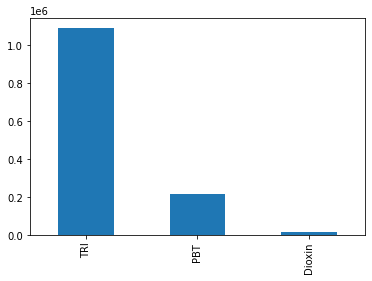

In [ ]:
df.CLASSIFICATION.value_counts().plot.bar()


In [ ]:
group_by_year = df.groupby(['PARENT_COMPANY_NAME'])
group_by_year.size()

PARENT_COMPANY_NAME
3A COMPOSITES USA INC                      42
3M                                          5
3M CO                                    4739
3P HOLDINGS INC                            78
4-D CORROSION CONTROL SPECIALISTS INC      10
                                         ... 
ZOLTEK CORP                                 6
ZOLTEK COS INC.                            24
ZSCHIMMER & SCHWARZ                        76
ZSCHIMMER & SCHWARZ INC                    92
ZTM INC.                                    8
Length: 6973, dtype: int64

In [ ]:

group_by_year = df.groupby(['METAL_CATEGORY'])
group_by_year.size()

METAL_CATEGORY
0    706850
1    455606
2     11653
3     13883
4      8040
0     75256
1     48465
2      1226
3      1517
4       883
dtype: int64

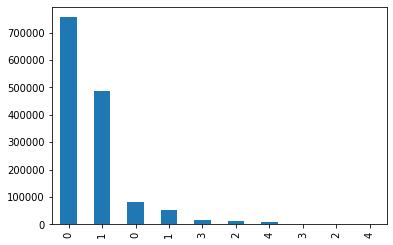

In [ ]:
df.METAL_CATEGORY.value_counts().plot.bar()
